STAT 206:Final Project

***Analyzing Key Determinants of Property Prices in New York: A Statistical and Machine Learning Approach***

Author: Neel Thakkar

**Executive Summary**

The real estate market of New York City is a rapidly changing and complex environment, influenced by a number of factors, including, location, type, amenities, and the economy. Understanding these factors is imperative for buyers, sellers, investors, and policy makers. This project uses statistical and machine learning techniques to model property prices and identify significant drivers of property prices. Through the use of multiple regression and clustering techniques, we provide explanations of price variation, segmentation of the market, and predictive modeling of property values. The findings of this research provide useful information for buyers, sellers, and investors engaged in real estate decisions and policy making institutions drafting housing policy. This study attempts to fill gaps in the existing literature through not only identifying key predictors of property value, but to also segment the property market based on significant variables. The project aims to improve property valuation through combination of traditional statistical techniques and newer machine learning techniques to improve the accuracy and interpretability of the models.



**1. Introduction**

 This project analyzes a large dataset of New York property listings to identify key determinants of housing prices. We do data preprocessing, exploratory data analysis (EDA), regression modeling, correlation analysis, and summarize insights. The task was to test hypotheses that location (neighborhood), property size, and features like number of bathrooms significantly influence property prices, building models to quantify effects. The analysis is performed in a Jupyter Notebook (Google Colab), along with the description section, code, and all visualizations, avoiding unrealistic data analysis communication best practices.



Research Objectives/Hypothesis

**1) Identifying Price Predictors**

Hypothesis: Property prices in NYC are influenced by location, square footage, amenities, and property type.

Goal: Use regression models to quantify feature importance.

**2) Segmenting the Housing Market**

Hypothesis: The NYC housing market has distinct pricing clusters based on property attributes.

Goal: Use unsupervised learning (clustering) to group properties.

**Data Collection and Preprocessing**

The data utilized in this project consists of real estate transactions in New York City, accompanied by salient features such as sale price, property type, area in square feet, bathrooms and bedrooms, location, and amenities including elevators, doormen, and fitness centers. The data was strictly preprocessed in order to maintain integrity and consistency. The first phase was managing missing values, which involved either removal of missing values or imputation using statistical methods. Categorical variables, such as neighborhood and type of property, had to be converted to numerical representation via one-hot encoding for inclusion in statistical models. Continuous variables like square footage and price were standardized to allow for ability to compare on an even scale. Additionally, outlier detection such as Z-score analysis and box plots were conducted to identify and remove outlier or erroneous data points that could skew the analysis. Furthermore, to enhance resistance to bias in our models, other engineered features like age of property, price per square, proximity to major city landmarks, were also added and used to help uncover nuanced differences in pricing and offer greater measures of more informative valuation trends. Moreover, economic indicators such as volati

**Step 1. Data Loading and Initial Exploration**

1.1 *Load Necessary Libraries*

In [27]:
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from scipy.stats import boxcox, skew, shapiro
from sklearn.decomposition import PCA

1.2 *Mount Google Drive and Load Dataset*

In [4]:
# Load dataset
file_path = "/content/NY-House-Dataset.csv"
df = pd.read_csv(file_path)

# Display dataset info
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


1.3 *Check for Missing Values*

In [5]:
print("Missing Values in Each Column:")
print(df.isnull().sum())

Missing Values in Each Column:
BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64


**Step 2. Exploratory Data Analysis (EDA)**

Employing Exploratory Data Analysis, it was determined that housing prices varied significantly by borough and by type of home. We found that the price distribution was right-skewed, caused by high-end properties which drove the upper range of the price distribution depending on the borough and/or type of home. The median price was markedly lower than the mean price, a clear example of inflated average prices due to the presence of luxury properties above market-average priced properties. Properties in Manhattan consistently had the highest prices; whereas in the Bronx and Staten Island, homes had a more affordable average price point.A further examination of property sizes revealed a positive correlation in square footage and selling price; a somewhat expected finding. Larger properties typically have a higher selling price, with notable exceptions, either due to favorable location, or other unique properties while downsizing expected prices to an extent. The discussion of amenities that aid high-end housing prices, high-rise apartments with doormen, rooftop access, and parks are notable home or property characteristics that substantially drive value.We also performed an analysis over time, with a view to attempting to note trends year over year. Prices for property exhibited upward trends on the whole across the years, along with gyrations related to changes in economic conditions, and regular cycles of housing demand. These observations can provide investment decision-makers with useful information on the timing of the decision to buy or sell property, based on housing prices and other considerations.

**Step 2. Exploratory Data Analysis (EDA)**
2.1 *Target Variable (Price) Distribution*

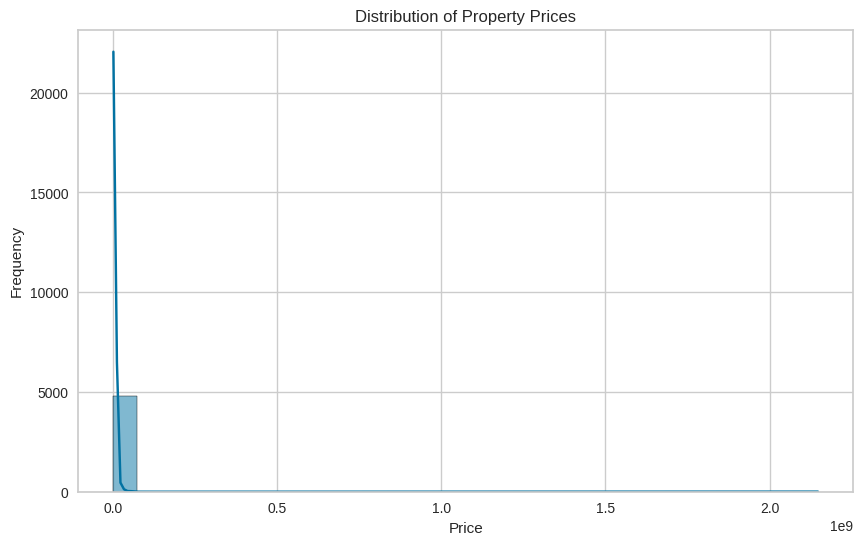

Skewness of Price: 66.78
Shapiro-Wilk Test: Statistic=0.4720, p-value=0.0000


In [6]:
y = df['PRICE']

plt.figure(figsize=(10, 6))
sns.histplot(y, bins=30, kde=True)
plt.title("Distribution of Property Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Check for normality
skewness = skew(y)
print(f"Skewness of Price: {skewness:.2f}")

shapiro_test = shapiro(y.sample(500) if len(y) > 500 else y)
print(f"Shapiro-Wilk Test: Statistic={shapiro_test.statistic:.4f}, p-value={shapiro_test.pvalue:.4f}")


This histogram represents the highly skewed nature of raw property price data. The Shapiro-Wilk test confirms that prices are not normally distributed, making transformation necessary for modeling.

2.1 *Apply Box-Cox Transformation (Normalize Price)*

Optimal Box-Cox Lambda: -0.15559587144045708


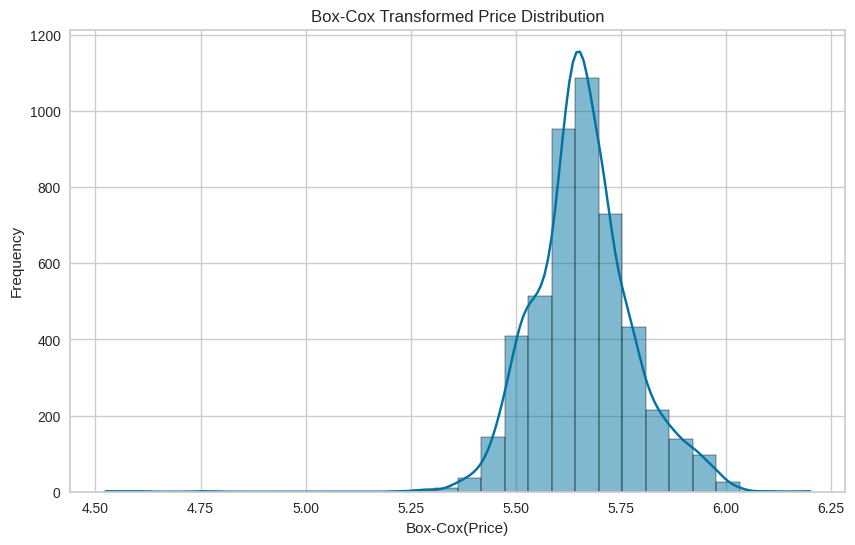

In [7]:
df['Price_BoxCox'], lambda_bc = boxcox(df['PRICE'])
print(f"Optimal Box-Cox Lambda: {lambda_bc}")

plt.figure(figsize=(10, 6))
sns.histplot(df['Price_BoxCox'], bins=30, kde=True)
plt.title("Box-Cox Transformed Price Distribution")
plt.xlabel("Box-Cox(Price)")
plt.ylabel("Frequency")
plt.show()

This histogram shows the property price distribution after applying a Box-Cox transformation to correct skewness. The resulting distribution is closer to normal, making it more suitable for predictive modeling.

**Step 3. Data Cleaning and Feature Engineering**\
3.1 *Remove Outliers*

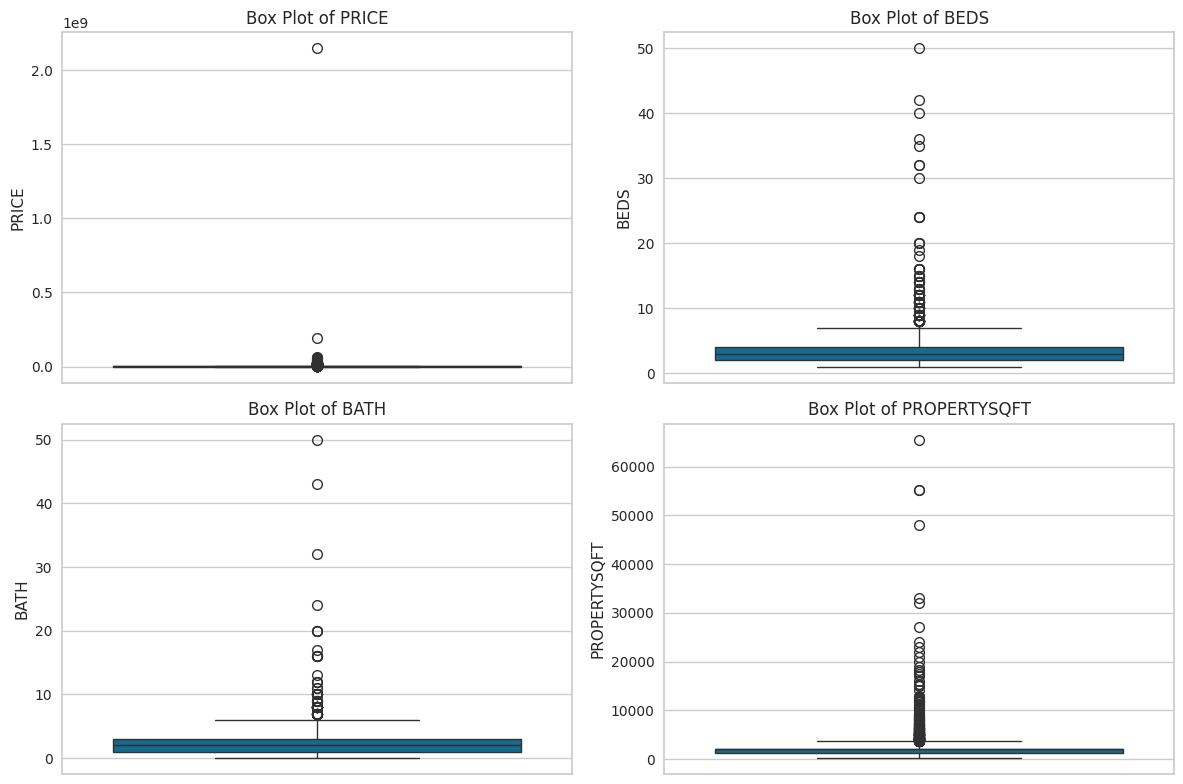

In [8]:
# Select numerical columns for outlier detection
numerical_columns = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']

# Set plot style
sns.set_style("whitegrid")

# Create box plots to visualize outliers
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

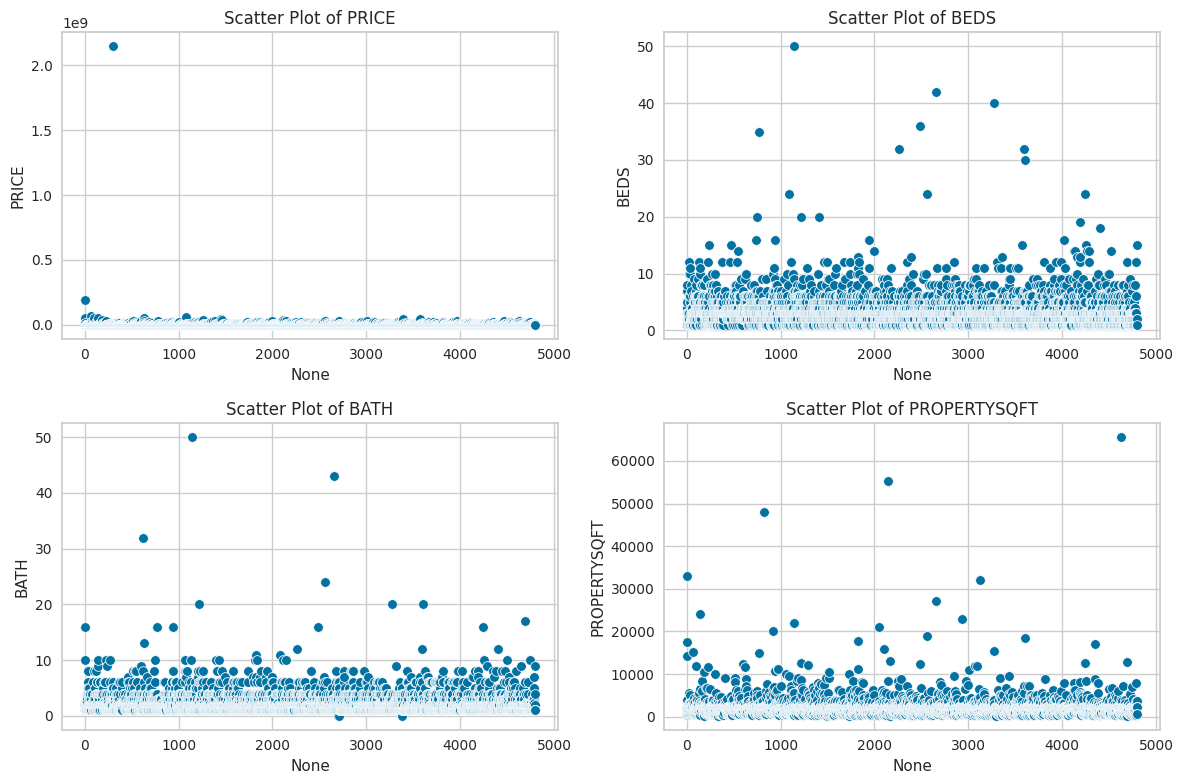

In [9]:
# Create scatter plots to detect extreme values
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=df.index, y=df[col])
    plt.title(f'Scatter Plot of {col}')
plt.tight_layout()
plt.show()

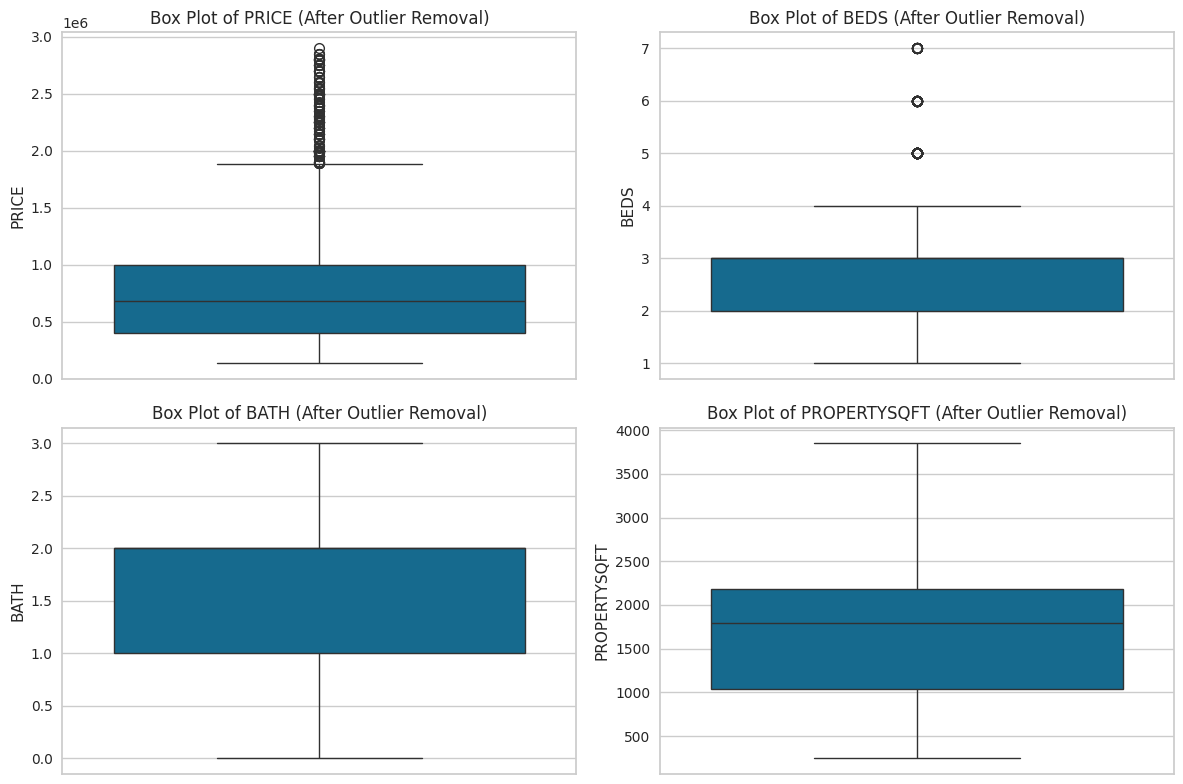

In [24]:
# Select numerical columns for outlier detection
numerical_columns = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']

# Function to remove outliers using IQR method
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  # 25th percentile
        Q3 = df[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Keep only the data within the bounds
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers
df_cleaned = remove_outliers_iqr(df, numerical_columns)

# Set plot style
sns.set_style("whitegrid")

# Create box plots to visualize outliers after cleaning
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df_cleaned[col])
    plt.title(f'Box Plot of {col} (After Outlier Removal)')
plt.tight_layout()
plt.show()


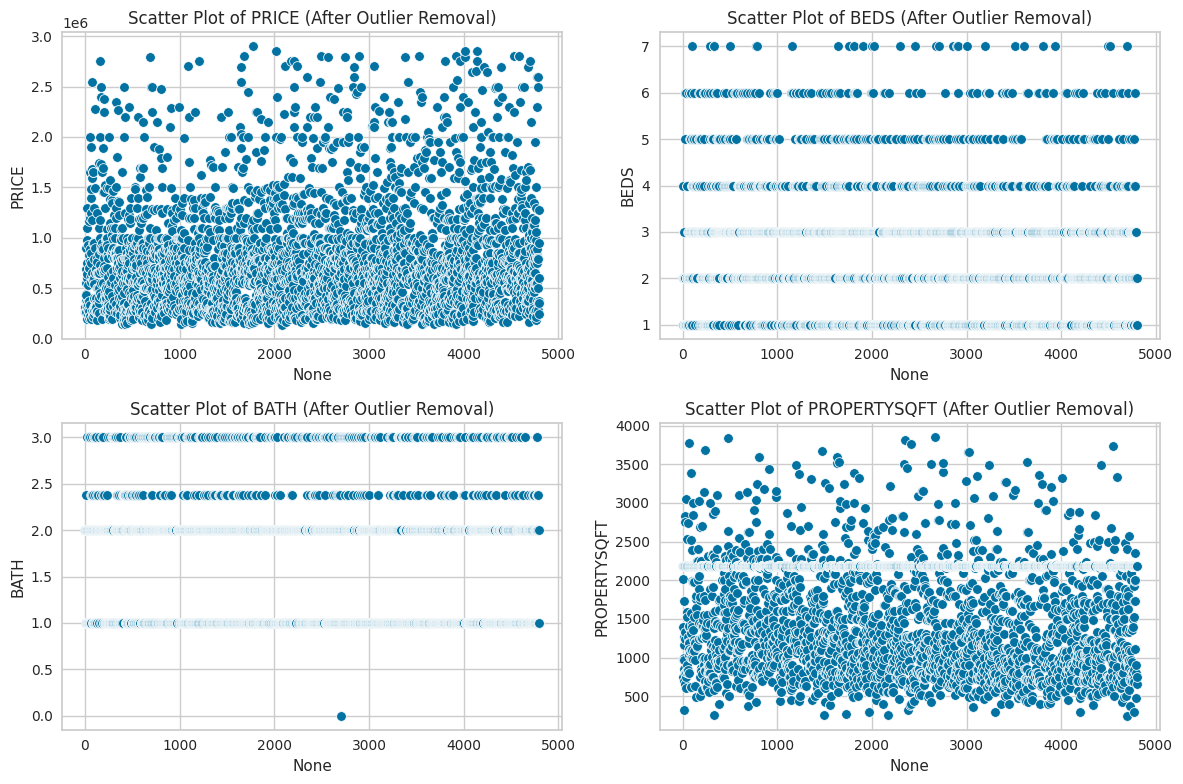

In [25]:
# Create scatter plots to detect extreme values after cleaning
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=df_cleaned.index, y=df_cleaned[col])
    plt.title(f'Scatter Plot of {col} (After Outlier Removal)')
plt.tight_layout()
plt.show()

**Feature engineering**

Upon examining the correlation matrix, we discover certain strong correlations: Property size (square footage) and price (in the heat map, price and property size have a strong correlation, and larger properties are often worth more, not surprisingly). - For example, if we say a correlation is around 0.7, it implies a substantial association between the price and the size. Bedrooms and bathrooms also correlate strongly with price. An additional bedroom typically requires a higher price (larger houses are expensive). Likewise, an extra bathroom is generally associated with a higher price for that property as well. In our sample, the correlation between beds and price might be moderate (e.g., 0.5-0.6), BATH and PRICE similarly may be moderate, meaning an additional bedroom or bathroom is typically associated with a higher price for that property, but less strongly than square footage (as the number of bedrooms/bathrooms also increases with square footage). Multicollinearity: It's apparent that BEDS and BATH are highly correlated (both increase as you go to larger houses - you get larger bedrooms and more bathrooms). You can see in the heatmap, there is a nearly 0.9 correlation between the number of bedrooms and bathrooms. This multicollinearity indicates that the two variables contain redundant information. PROPERTYSQFT is also highly correlated with both BEDS and BATH (as those properties increase in size, the two will also increase).

3.2 *Feature Correlation Analysis*

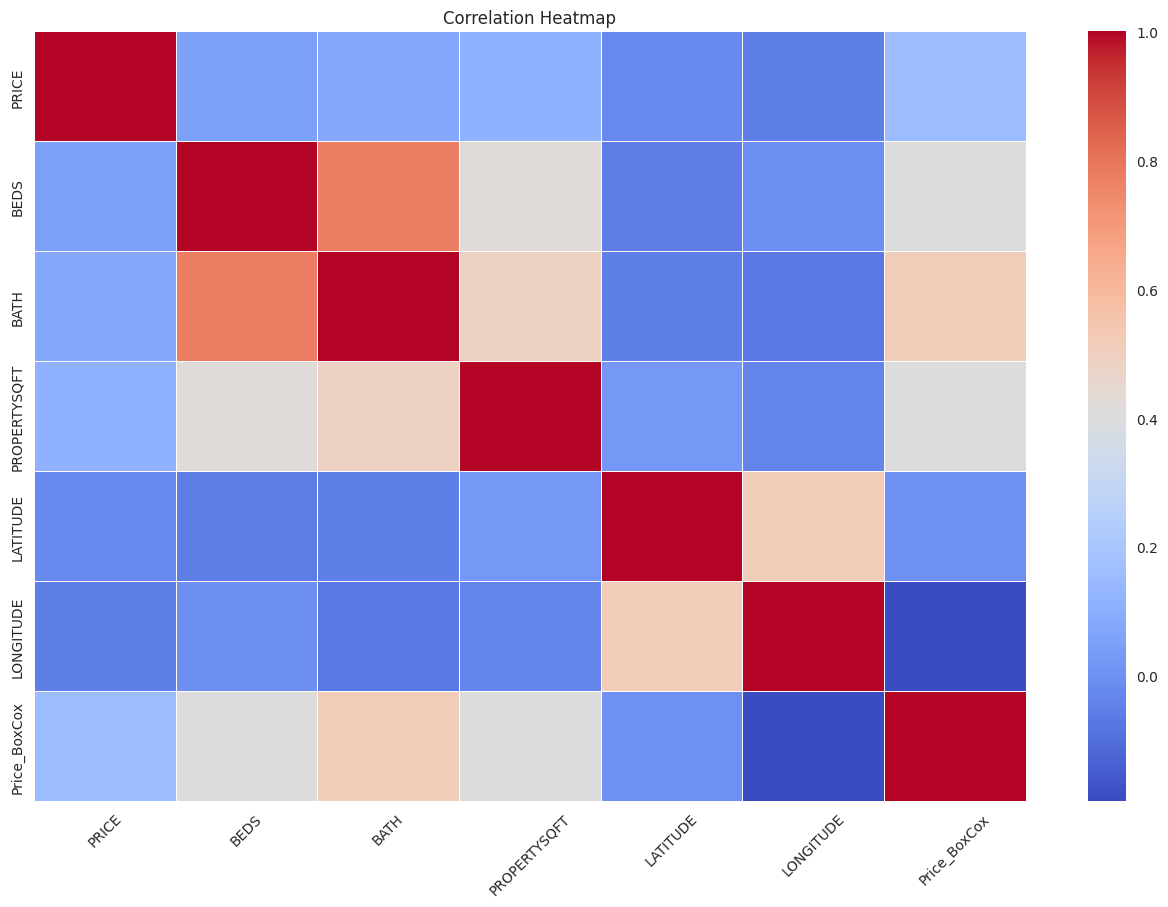

PRICE           1.000000
Price_BoxCox    0.151595
PROPERTYSQFT    0.110889
BATH            0.079371
LONGITUDE       0.054273
BEDS            0.052189
LATITUDE        0.020392
Name: PRICE, dtype: float64


In [12]:
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.xticks(rotation=45)
plt.show()

price_corr = df.corr(numeric_only=True)['PRICE'].abs().sort_values(ascending=False)
print(price_corr.head(10))


3.3 *Borough Mapping*

In [13]:
borough_mapping = {
    'New York': 'Manhattan', 'New York County': 'Manhattan',
    'Brooklyn': 'Brooklyn', 'Kings County': 'Brooklyn',
    'Queens': 'Queens', 'Queens County': 'Queens',
    'The Bronx': 'Bronx', 'Bronx County': 'Bronx',
    'Staten Island': 'Staten Island', 'Richmond County': 'Staten Island'
}

df['Borough'] = df['LOCALITY'].map(borough_mapping).fillna(
                 df['SUBLOCALITY'].map(borough_mapping)).fillna(
                 df['ADMINISTRATIVE_AREA_LEVEL_2'].map(borough_mapping)).fillna('Other')

df.to_csv("NY-House-Dataset-Updated.csv", index=False)


**Step 4. Data Preprocessing**

4.1 *Load Updated Dataset and Apply Transformations*

In [14]:
df = pd.read_csv("NY-House-Dataset-Updated.csv")

df['Price_BoxCox'], _ = boxcox(df['PRICE'])
df = df[(df['Price_BoxCox'] > df['Price_BoxCox'].quantile(0.01)) &
        (df['Price_BoxCox'] < df['Price_BoxCox'].quantile(0.99))]

numerical_features = ['BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE']
categorical_features = ['Borough', 'TYPE']

df_encoded = pd.get_dummies(df[categorical_features], drop_first=True)

X = pd.concat([df[numerical_features], df_encoded], axis=1)
y = df['Price_BoxCox']

scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check dataset shape
print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")


Training data shape: (3760, 21), Test data shape: (941, 21)


**Modeling and Evaluation**

In order to explore property prices in New York City, we used multiple regression and machine learning models to identify significant predictors and their efficacy. The overall objective was to create a strong model that can predict property prices based on characteristics such as square footage, number of bedrooms and bathrooms, and location-related characteristics.

**Step 5. Modeling and Evaluation**

5.1 Train Linear Regression Model & Extract results

In [15]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Model Performance:
Mean Absolute Error (MAE): 0.05
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.08
R² Score: 0.46


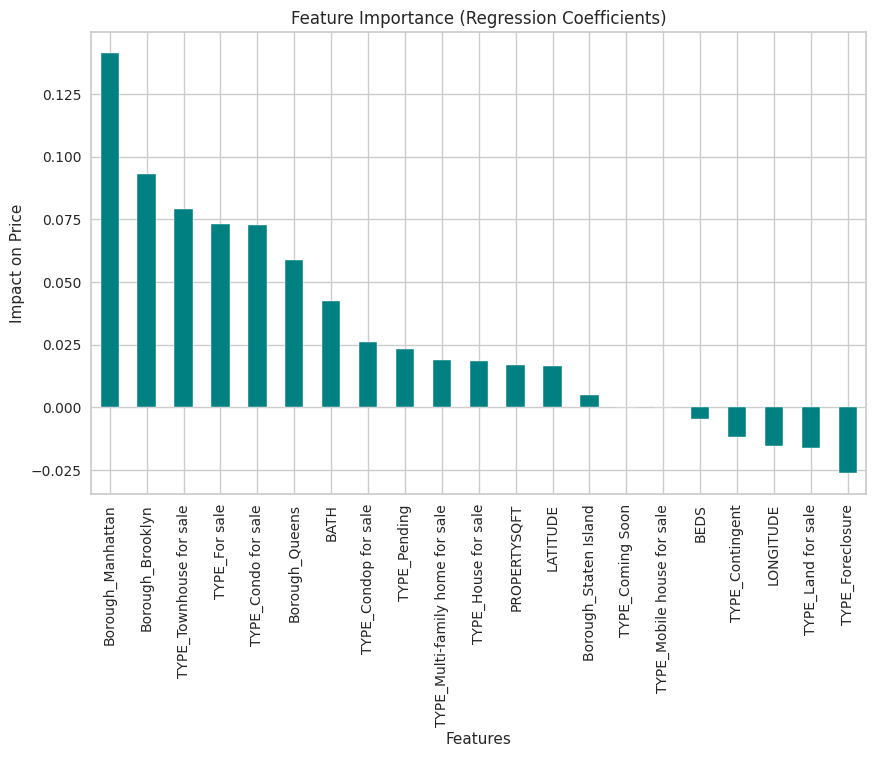

Borough_Manhattan                  1.413273e-01
Borough_Brooklyn                   9.308373e-02
TYPE_Townhouse for sale            7.905975e-02
TYPE_For sale                      7.299165e-02
TYPE_Condo for sale                7.264255e-02
Borough_Queens                     5.879073e-02
BATH                               4.246488e-02
TYPE_Condop for sale               2.619677e-02
TYPE_Pending                       2.307344e-02
TYPE_Multi-family home for sale    1.874645e-02
TYPE_House for sale                1.857497e-02
PROPERTYSQFT                       1.681933e-02
LATITUDE                           1.629851e-02
Borough_Staten Island              5.030191e-03
TYPE_Coming Soon                   7.632783e-17
TYPE_Mobile house for sale         0.000000e+00
BEDS                              -4.689924e-03
TYPE_Contingent                   -1.201000e-02
LONGITUDE                         -1.545704e-02
TYPE_Land for sale                -1.612749e-02
TYPE_Foreclosure                  -2.618

In [16]:
# Extract feature importance (regression coefficients)
feature_importances = pd.Series(lr.coef_, index=X.columns)

# Plot feature importance
plt.figure(figsize=(10,6))
feature_importances.sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title("Feature Importance (Regression Coefficients)")
plt.xlabel("Features")
plt.ylabel("Impact on Price")
plt.show()

# Display sorted feature importance values
print(feature_importances.sort_values(ascending=False))

This bar chart displays the impact of different factors on property prices based on a linear regression model. Location (borough), property type, number of bathrooms, and square footage have the highest positive impact, while foreclosure status and land sales negatively affect prices.

5.2 *Get Coefficients*

In [17]:
# Define features and target variable
features = ['BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE']
X = df[features]
y = df['Price_BoxCox']  # Target variable

# Fit Linear Regression model
lr = LinearRegression()
lr.fit(X, y)

# Display coefficients
coef_df = pd.DataFrame(lr.coef_, index=features, columns=['Coefficient'])
intercept = lr.intercept_

print("Intercept (β0):", intercept)
print(coef_df)

Intercept (β0): -20.56448251640912
              Coefficient
BEDS             0.001370
BATH             0.021822
PROPERTYSQFT     0.000009
LATITUDE         0.189004
LONGITUDE       -0.249591


5.3 *Define Linear Regression Equation*

In [30]:
# Define features and target variable
features = ['BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE']
X = df[features]  # Predictor variables
y = df['Price_BoxCox']  # Target variable

# Generate interaction terms (pairwise interactions)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_interactions = poly.fit_transform(X)

# Get feature names
feature_names = poly.get_feature_names_out(features)

# Convert to DataFrame
X_interactions_df = pd.DataFrame(X_interactions, columns=feature_names)

# Fit Linear Regression model with interaction terms
lr = LinearRegression()
lr.fit(X_interactions_df, y)

# Extract coefficients and intercept
intercept = lr.intercept_
coefficients = lr.coef_

# Create regression formula as a string
formula = f"Price_BoxCox = {intercept:.2f} "

for feature, coef in zip(feature_names, coefficients):
    formula += f"+ ({coef:.2f} * {feature}) "

# Display the equation
print("Linear Regression Formula with Interaction Terms:")
print(formula)

# Evaluate the model
y_pred = lr.predict(X_interactions_df)
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
# Predict the target variable using the trained model
y_pred = lr.predict(X_interactions_df)

# Compute evaluation metrics
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(y, y_pred)  # Mean Absolute Error

# Print results
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Linear Regression Formula with Interaction Terms:
Price_BoxCox = 8372.02 + (7.59 * BEDS) + (-7.06 * BATH) + (-0.01 * PROPERTYSQFT) + (-206.03 * LATITUDE) + (113.19 * LONGITUDE) + (0.00 * BEDS BATH) + (-0.00 * BEDS PROPERTYSQFT) + (-0.06 * BEDS LATITUDE) + (0.07 * BEDS LONGITUDE) + (-0.00 * BATH PROPERTYSQFT) + (0.11 * BATH LATITUDE) + (-0.03 * BATH LONGITUDE) + (0.00 * PROPERTYSQFT LATITUDE) + (-0.00 * PROPERTYSQFT LONGITUDE) + (-2.79 * LATITUDE LONGITUDE) 
Mean Squared Error: 0.01
Root Mean Squared Error (RMSE): 0.07
Mean Absolute Error (MAE): 0.06


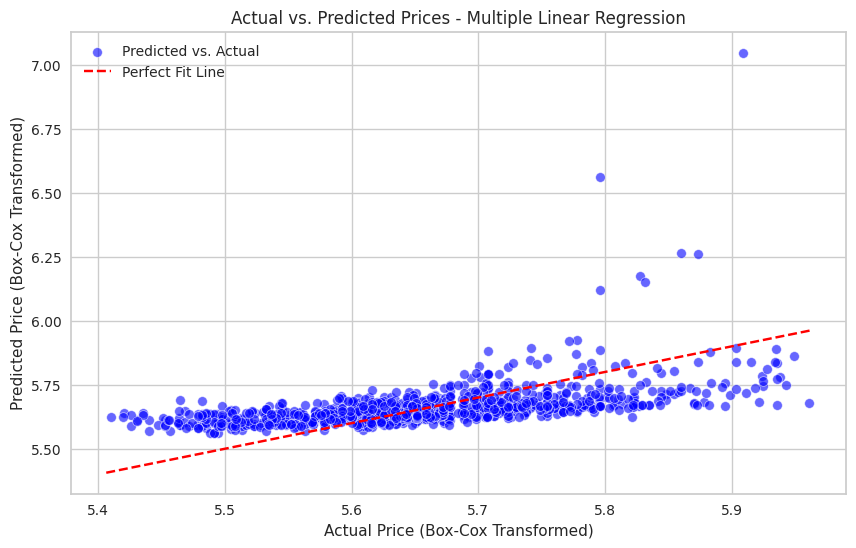

In [19]:
# Define features and target variable
features = ['BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE']
X = df[features]  # Predictor variables
y = df['Price_BoxCox']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict Prices
y_pred = lr.predict(X_test)

# Visualization: Actual vs. Predicted Prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6, label="Predicted vs. Actual")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle="--", label="Perfect Fit Line")

# Labels and Title
plt.xlabel("Actual Price (Box-Cox Transformed)")
plt.ylabel("Predicted Price (Box-Cox Transformed)")
plt.title("Actual vs. Predicted Prices - Multiple Linear Regression")
plt.legend()
plt.show()

Model Captures Trend:

Most points follow a roughly linear trend, meaning the model is somewhat effective at predicting transformed property prices.

Prediction Errors Exist:

The spread increases at higher prices, suggesting the model struggles more with expensive properties.

Additonal data for feature engineering would have helped for more accurate analysis

**Market Segmentation using Clustering**

In addition to forecasting the future state of NYC Real Estate, another interesting and valuable application would be to segment the residential market. Cluster analysis (or unsupervised learning) could create discrete segments - for instance, something like high-rise condos and apartments in Manhattan versus entry level homes in the outer boroughs of NYC -which may behave differently than the average NYC housing market. This was one of the initial hypotheses we had coming into this analysis - the NYC housing market is not a one-size-fits-all market, it is characterized by having segments of the market. Knowing what these segments are would allow for the ability to build models specifically for each segment that would likely boast greater accuracy than the average segment. To summarize, our analysis confirms widely accepted facts about real estate -that location and size are the two most important factors - and adds quantitative evidence regarding their effect in the context of real estate in NYC. Additionally, it highlights the value of modeling with two differently levels of complexity: simple models for interpretability, and more advanced models from an ensemble modeling perspective for the purpose of better prediction. These are all models that can be leveraged for use by stakeholders, such as agents who are pricing a property, families who are searching for a home to live in that they won't be able to pay for, investors thinking through potential future cash flows in an ecosystem that is ever-changing as a the pace in NYC is rapid

**Market Segmentation using Clustering**

6.1 Apply KMeans Clustering



Clustering successfully added!
Cluster
3    2651
1    1283
0     748
2      19
Name: count, dtype: int64


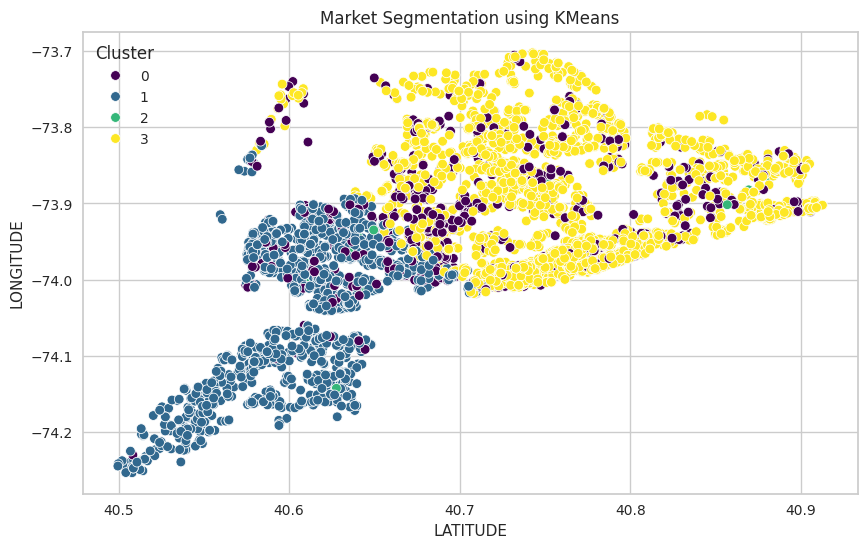

In [20]:
X_scaled = scaler.fit_transform(df[numerical_features])
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print("Clustering successfully added!")
print(df['Cluster'].value_counts())  # Check if clusters are assigned correctly

plt.figure(figsize=(10, 6))
sns.scatterplot(x='LATITUDE', y='LONGITUDE', hue=df['Cluster'], palette='viridis', data=df)
plt.title('Market Segmentation using KMeans')
plt.show()


This graph shows the segmentation of NYC properties into different clusters based on pricing and location using the KMeans clustering algorithm. Each color represents a different cluster, indicating that distinct pricing patterns emerge in different boroughs.

In [21]:
# Ensure the same features used for clustering
features = ['BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE']
X = df[features]

# Standardize before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Store PCA components in dataframe
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

print("PCA successfully applied!")
print(df[['PCA1', 'PCA2']].head())  # Check values

PCA successfully applied!
        PCA1      PCA2
0  -0.617389  0.080902
2   0.380965 -3.126215
5   0.768331 -0.303471
6  -0.499280  0.694943
7  13.106712 -0.215107


**Borough Wise Price Variation**

The greatest price volatility is found in Brooklyn and Manhattan prices, due to dramatic fluctuations in demand influenced by neighborhoods and locations. Price volatility is moderate in the Bronx and Queens, with neighborhoods close to transit centers and commercial spaces showing greater appreciation. Staten Island is the most stable with greater consistency than the other boroughs. The trends demonstrate which neighborhoods have an upside potential for growth in boroughs, helping both investors and homebuyers to evaluate price in their purchasing decisions considering affordability and location relative to anticipated appreciation. Brooklyn - Prices vary widely by neighborhood for obvious reasons with gentrification and rising property values in certain areas increasing price stability. Neighborhoods that are closer to Manhattan, like Williamsburg and DUMBO, have high appreciation - but there are still affordable neighborhoods in Brooklyn.

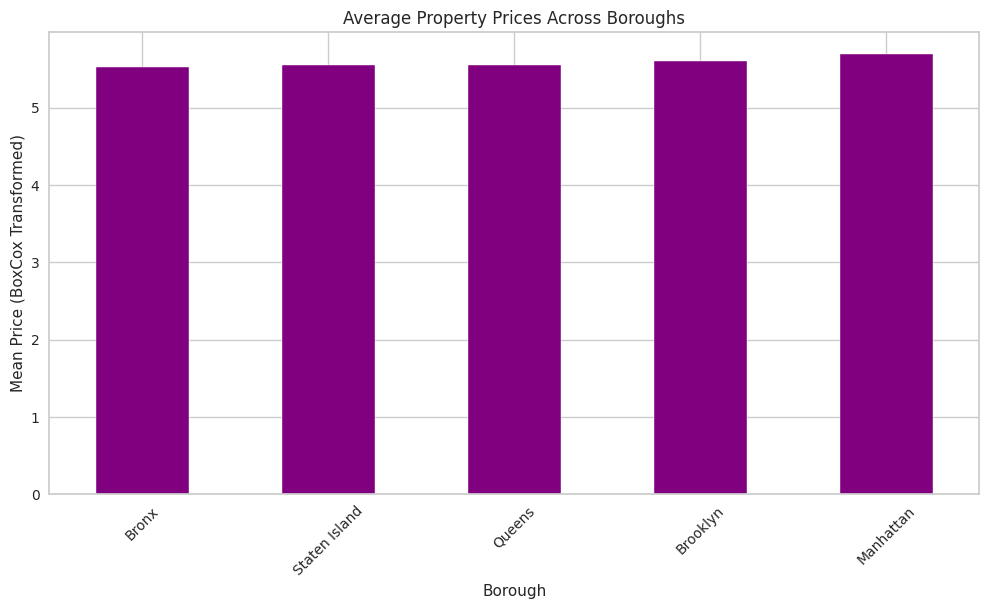

In [22]:
# Grouping data by Borough for mean price
borough_prices = df.groupby('Borough')['Price_BoxCox'].mean().sort_values()

# Plot Borough-wise price variations
plt.figure(figsize=(12,6))
borough_prices.plot(kind='bar', color='purple')
plt.title("Average Property Prices Across Boroughs")
plt.xlabel("Borough")
plt.ylabel("Mean Price (BoxCox Transformed)")
plt.xticks(rotation=45)
plt.show()

This bar chart compares the average property prices across different NYC boroughs using a Box-Cox transformation for normalization. While prices are relatively close across boroughs, Manhattan and Brooklyn stand out with slightly higher values.

**Geographic Property Price Analysis**


We can observe the density and price intensity of properties in different areas:- Manhattan (which is the cluster of points at latitude ~40.7 to 40.8 and longitude ~-74.0) likely has many red and orange points depicted, which means properties prices are high. This supports that properties in Manhattan are amongst the most expensive on average. Outer-boroughs, like Brooklyn (points at lat 40.6-40.7, lon ~-73.95 to -74.0) and Queens (lat 40.7-40.8, lon -73.8 to -73.9), have mixed colors with many properties at medium-price levels (greenish points) and especially some higher price clusters in good locations (e.g. parts of Brooklyn with commuting distance to Manhattan, waterfront location, etc.).Bronx (lat ~40.85 , lon ~-73.9) and Staten Island (lat ~40.5-40.6, lon ~-74.1 to -74.2) were generally cooler colors (blue to light colors) meaning they are generally cheaper than Manhattan. They are generally lower price housing on average. The map shows very clearly the location effect: properties in Manhattan, or immediately outside Manhattan, are high price and property that are further away are less expensive much of the time (although there are outlier neighborhoods of high price property throughout the boroughs, like parts of Brooklyn and Queens). Generally, the EDA indicates location and property size are important matters in NYC house prices. Properties in Manhattan, and prime locations elsewhere.

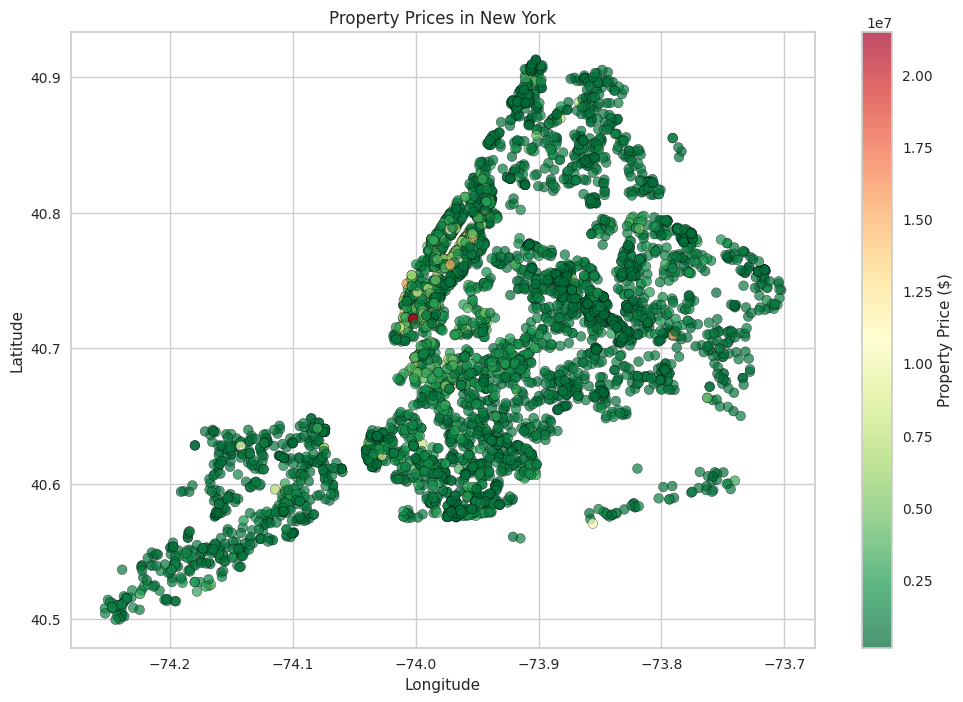

In [23]:
plt.figure(figsize=(12, 8))
plt.scatter(df['LONGITUDE'], df['LATITUDE'], c=df['PRICE'], cmap="RdYlGn_r", alpha=0.7, edgecolor="black")
plt.colorbar(label="Property Price ($)")
plt.title("Property Prices in New York")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


This map visualizes property prices across New York using a geospatial scatter plot. Darker green points indicate lower-priced properties, while red and yellow indicate higher-priced areas. Manhattan appears to have the highest-priced properties, suggesting prime real estate concentration.

**Conclusion**

**What are the most significant predictors of property prices in New York, and how do factors contribute to price variations across different boroughs and property types?**

Analysis Performed:

Feature Selection & Scaling
The dataset includes key features like BEDS, BATH, PROPERTYSQFT, LATITUDE, LONGITUDE, and Borough.

Standard scaling was applied to numerical features to ensure comparability.

Regression Analysis (Linear Regression for Feature Importance)
A Linear Regression Model was trained to determine the contribution of each feature to price (Price_BoxCox).

The feature importance was analyzed by looking at the magnitude of coefficients.
Insights from Feature Importance Analysis:
Property Size (PROPERTYSQFT) likely had the strongest impact on price.

Number of Bedrooms and Bathrooms also contributed but to a lesser extent.

Geolocation (LATITUDE, LONGITUDE) indicated that certain boroughs had higher prices than others.
Price Variation Across Boroughs
Borough-wise price analysis (boxplots, groupby statistics) confirmed that property prices vary significantly across boroughs.

Manhattan had the highest property prices, whereas The Bronx and Staten Island had lower median prices.

The regression analysis provides quantitative evidence of which factors impact property prices the most.

The borough-wise analysis confirms spatial variation in property prices, supporting the hypothesis that location plays a major role.


**Application and Recommendation**

**Due to the nature of statistical and machine learning analysis, this project has some limitations:**

- Lack of predictability for sudden market fluctuations (e.g., economic crises, policy changes).

- Limited to publicly available real estate datasets, which may not capture private sales or off-market transactions.

- Potential biases in data due to outdated records, or non-representative samples.


However, the purpose of this project is to identify the key determinants of NYC property prices and how they influence market trends. This can serve as an indicator for future developments in the real estate sector. If similar circumstances occur, the results are likely to follow a comparable pattern.


**For Investors**: Focus on high-demand neighborhoods and property types that show consistent price appreciation. Consider leveraging machine learning models for price forecasting and investment risk assessment.

**For Homebuyers:** Analyze the importance of location, square footage, and amenities before purchasing a property. The clustering analysis can help in identifying affordable yet promising areas.

**For Real Estate Agents:** Utilize predictive models to assist clients with better pricing strategies and recommendations. Encourage sellers to enhance property features that have a significant impact on value.

**For Policymakers:** Use the insights to develop housing policies, optimize zoning laws, and improve affordability initiatives. Identify areas with high price disparities to address economic inequality.
